#     **SPOTIFY MOOD PREDICTION AND MUSIC RECOMMENDATION SYSYEM** 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


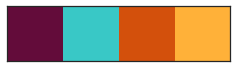

In [ ]:
import numpy as np
import os
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [ ]:
path='/content/drive/MyDrive/spotify/data.csv'

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/spotify/data.csv')

In [ ]:
data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [ ]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [ ]:
data.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [ ]:
s=data.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(170652)


In [ ]:
"s.head(10)

artists
['The Beatles']           19218
['Frank Sinatra']         17987
['Elvis Presley']         17188
['The Rolling Stones']    16477
['Fleetwood Mac']         15675
['Bob Dylan']             14570
['Led Zeppelin']          13498
['Queen']                 13202
['Johnny Cash']           12802
['The Beach Boys']        12216
Name: popularity, dtype: int64

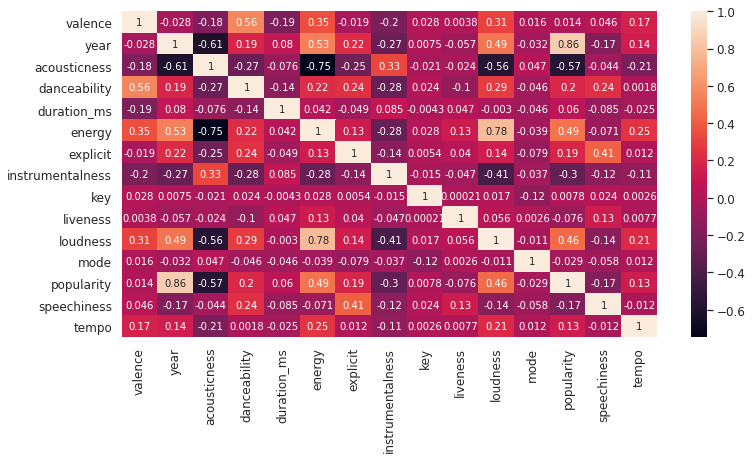

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)

<Figure size 1152x576 with 0 Axes>

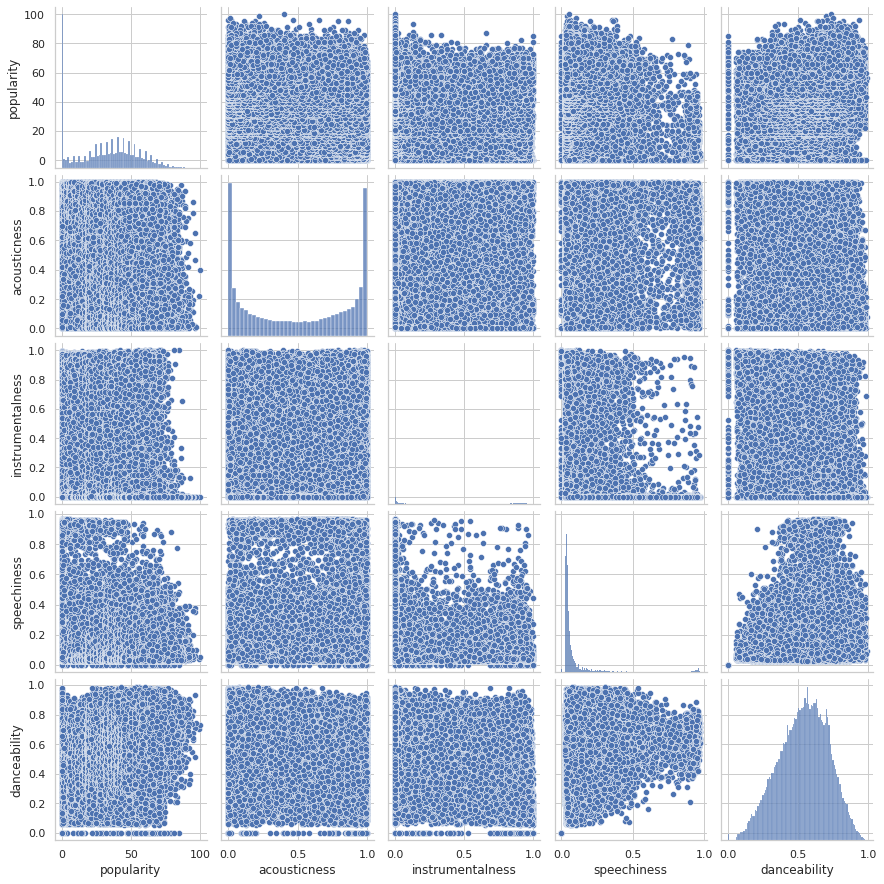

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
cols = ["popularity","acousticness","instrumentalness","speechiness","danceability" ]
sns.pairplot(data[cols], height = 2.5 )
plt.show();

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

# **FEATURE SELECTION**

In [ ]:

features = data[['danceability','liveness','acousticness','loudness','speechiness','valence','energy']]


DATA PREPROCESSING

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b53faa7f0>,
      dtype=object)

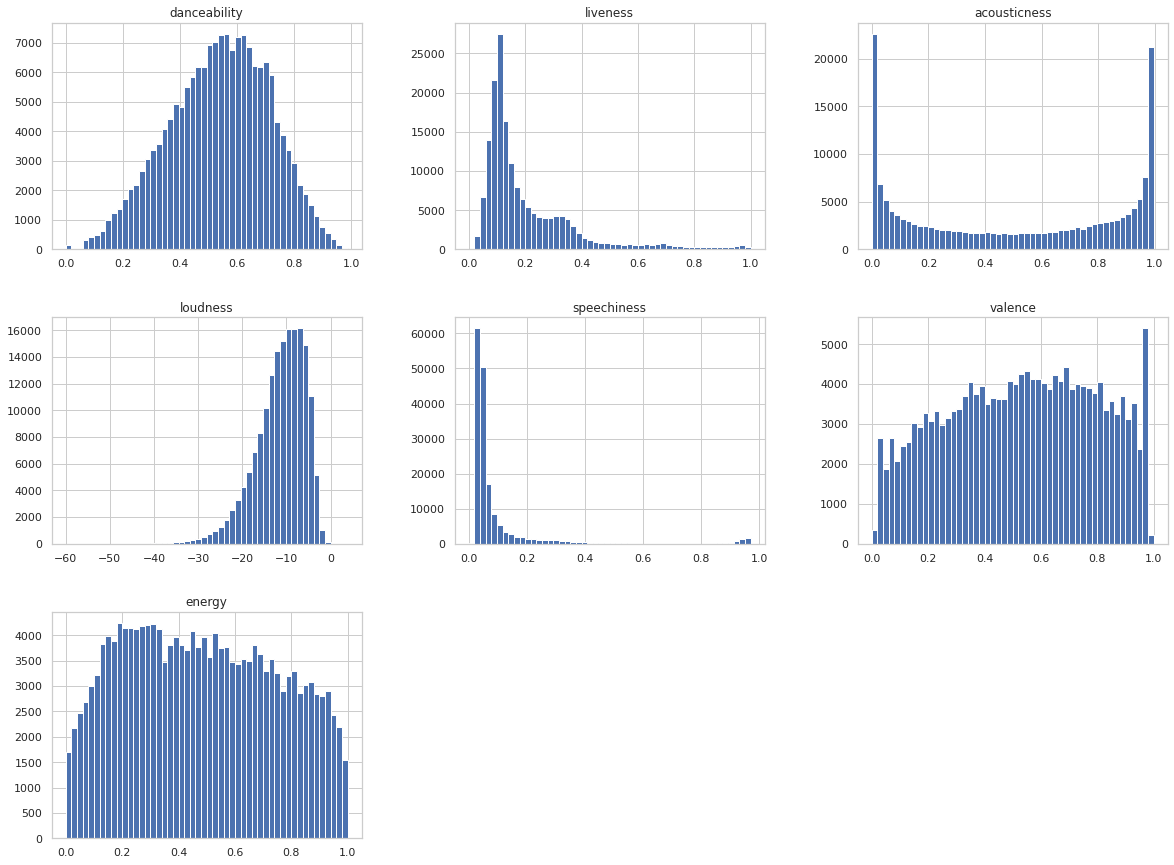

In [ ]:
from sklearn import preprocessing

loudness = features[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
data['loudness'] = pd.DataFrame(loudness_scaled)




features.hist(bins=50,figsize=(20,15))

**K NEAREST NEIGHBOR ALGORITHM**

In [ ]:
from sklearn.cluster import KMeans

sse = {}
K = range(1,12)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    sse[k]=km.inertia_

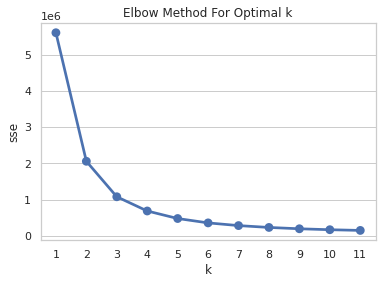

In [ ]:

plt.xlabel('k')
plt.ylabel('sse')
plt.title('Elbow Method To Find k')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))

OPTIMAL VALUE OF K IS 3

#**CLUSTERING AND MOOD PREDICTION**





In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)
labels=kmeans.labels_

In [ ]:
rfm=data.assign(Cluster=labels)
group=rfm.groupby(["Cluster"])
group.agg({
    
    'danceability':'mean',
    'loudness':'mean',
     'valence':'mean',
    'acousticness':['mean','count'],
   

}).round(1)

danceability loudness valence acousticness       
                mean     mean    mean         mean  count
Cluster                                                  
0                0.4      0.6     0.3          0.8  24186
1                0.6      0.8     0.6          0.3  77462
2                0.5      0.7     0.5          0.6  69005

In [ ]:
rfm_melt=pd.melt(rfm.reset_index(), id_vars =['artists','Cluster'],value_vars=['danceability','loudness','acousticness','valence'],var_name='Metric',value_name='Value')


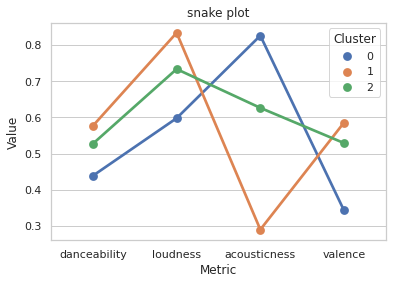

In [ ]:

plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('snake plot')
sns.pointplot(data=rfm_melt,x='Metric',y='Value',hue='Cluster')

cluster 0--->sad,depreesed


cluster 1--->cheerful,happy


cluster 2--->normal happy mood

In [ ]:
rfm[rfm['Cluster']==1]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,Cluster
3,0.165,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,0.793736,1,Danny Boy,3,1921,0.0354,100.109,1
14,0.493,1921,0.01750,['Zay Gatsby'],0.527,205072,0.691,1,0MJZ4hh60zwsYleWWxT5yW,0.384000,7,0.3580,0.825339,1,Power Is Power,0,1921-03-27,0.0326,159.935,1
24,0.410,1921,0.97000,['Mehmet Kemiksiz'],0.269,86988,0.143,0,0VhIFYGSpY0Z8IAIA3C6bX,0.469000,4,0.1660,0.798638,1,Ney Taksimi,0,1921,0.0413,141.386,1
27,0.723,1921,0.38800,['Mehmet Kemiksiz'],0.685,155063,0.698,0,0osXBirvQzPRfKSUDzHPCv,0.000002,4,0.0768,0.811463,0,Korkma Sönmez,0,1921,0.0421,133.951,1
33,0.470,1921,0.76600,['Mehmet Kemiksiz'],0.453,337607,0.559,0,107JTiqeqxj5P0ocypagMK,0.010400,9,0.2130,0.813217,1,Eşin Var âşiyâ Var,1,1921,0.0329,156.077,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.608,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,0.881654,1,China,72,2020-05-29,0.0881,105.029,1
170649,0.734,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,0.845353,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936,1
170650,0.637,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,0.904769,0,AYA,76,2020-11-03,0.0809,91.688,1
170651,0.195,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,0.827484,1,Darkness,70,2020-01-17,0.3080,75.055,1


In [ ]:
rfm[rfm['Cluster']==2]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,Cluster
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,0.744797,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,2
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,0.707071,1,Gati Bali,5,1921,0.0339,110.339,2
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,0.781521,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,2
5,0.1960,1921,0.57900,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.697,395076,0.346,0,4pyw9DVHGStUre4J6hPngr,0.168000,2,0.1300,0.743779,1,Gati Mardika,6,1921,0.0700,119.824,2
6,0.4060,1921,0.99600,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.1150,0.773800,1,The Wearing of the Green,4,1921,0.0615,66.221,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170612,0.4290,2020,0.02590,['Lil Durk'],0.908,178286,0.331,1,3ELLCuwPrhznALIu2UAwVB,0.000000,10,0.0718,0.740647,1,When We Shoot,64,2020-06-26,0.7220,139.995,2
170620,0.2590,2020,0.32400,['Phoebe Bridgers'],0.328,344693,0.320,0,3cr3oAP4bQFNjZBV7ElKaB,0.019000,1,0.2340,0.778608,1,I Know The End,66,2020-06-18,0.0350,111.453,2
170633,0.3520,2020,0.88600,['Tate McRae'],0.569,190652,0.271,0,2GSLoT7abyYGchSSDCpWEI,0.000000,10,0.1030,0.767849,1,Heather - Spotify Singles,64,2020-11-11,0.0271,91.888,2
170643,0.9070,2020,0.00952,"['DJ Scheme', 'Cordae', 'Ski Mask The Slump Go...",0.917,228333,0.569,1,3C9D1X8NkG2Ak1RaGpRnnQ,0.000000,7,0.0774,0.775883,1,Soda (feat. Take A Daytrip),66,2020-11-13,0.2790,144.014,2


In [ ]:
rfm[rfm['Cluster']==0]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,Cluster
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.21100,0,4BJqT0PrAfrxzMOxytFOIz,0.87800,10,0.6650,0.624916,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0
7,0.0731,1921,0.993,['Sergei Rachmaninoff'],0.389,218773,0.08800,0,02GDntOXexBFUvSgaXLPkd,0.52700,1,0.3630,0.609334,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867,0
8,0.7210,1921,0.996,['Ignacio Corsini'],0.485,161520,0.13000,0,05xDjWH9ub67nJJk82yfGf,0.15100,5,0.1040,0.602803,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678,0
11,0.5780,1921,0.994,['Ignacio Corsini'],0.378,155413,0.11500,0,0F30WM8qRpO8kdolepZqdM,0.90600,10,0.1100,0.516185,0,Por Que Me Dejaste - Remasterizado,0,1921-03-20,0.0414,70.370,0
15,0.2820,1921,0.989,"['Sergei Rachmaninoff', 'Ruth Laredo']",0.384,221013,0.17100,0,0NFeJgmTAV1kDfzSQNK41Z,0.82000,7,0.1160,0.618965,0,"10 Préludes, Op. 23: No. 5 in G Minor. Alla ma...",4,1921,0.0319,107.698,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170591,0.0495,2020,0.993,['Clyde Boudreaux'],0.133,151750,0.00512,0,0kKOC50fPTnqmrYvtJInsT,0.85100,9,0.0954,0.418213,1,Nepenthe,70,2020-01-31,0.0380,67.818,0
170599,0.3520,2020,0.951,['Anson Seabra'],0.691,222468,0.06820,0,6hjh2phISvfR1Ib6S0FK7b,0.00000,5,0.0916,0.654827,1,Trying My Best,69,2020-05-08,0.0645,76.940,0
170638,0.2100,2020,0.968,['Lana Del Rey'],0.234,186000,0.11400,0,25Mld9UGdMqXYDU2x8l3ld,0.00391,11,0.1030,0.639950,0,Summertime The Gershwin Version,57,2020-11-19,0.0366,189.986,0
170645,0.1690,2020,0.994,['Ólafur Arnalds'],0.281,190500,0.03330,0,13MOQ6oQqkrZEDkZOHukCw,0.95900,6,0.0995,0.446950,1,We Contain Multitudes (from home),70,2020-08-26,0.0348,90.250,0


# **MUSIC RECOMMENDATION**

In [ ]:
def recommend(n):
  print(rfm[rfm['Cluster']==n])



col=['name','Cluster']
n=rfm.name.to_list()
for i in n:
  i=i.upper()
v=rfm.Cluster.to_list()
while(1):
  print('Enter a song name:\n')
  song=input()
  song.upper()
  if song in n:
    print('Song found, generating recommendations:\n')
    song_index = n.index(song)
    sv=v[song_index]
    recommend(sv)
  else:
    print('Please enter a valid song name:\n')
    continue



  print("Do you want to type another song? (Y/N):\n")
  ans = input()
  ans.upper()
  if(ans=='N'):
    break
  else:
    continue


Enter a song name:

Faded
Song found, generating recommendations:

        valence  year  acousticness  ... speechiness    tempo  Cluster
3         0.165  1921       0.96700  ...      0.0354  100.109        1
14        0.493  1921       0.01750  ...      0.0326  159.935        1
24        0.410  1921       0.97000  ...      0.0413  141.386        1
27        0.723  1921       0.38800  ...      0.0421  133.951        1
33        0.470  1921       0.76600  ...      0.0329  156.077        1
...         ...   ...           ...  ...         ...      ...      ...
170648    0.608  2020       0.08460  ...      0.0881  105.029        1
170649    0.734  2020       0.20600  ...      0.0605  137.936        1
170650    0.637  2020       0.10100  ...      0.0809   91.688        1
170651    0.195  2020       0.00998  ...      0.3080   75.055        1
170652    0.642  2020       0.13200  ...      0.1080   94.991        1

[77476 rows x 20 columns]
Do you want to type another song? (Y/N):

N
